In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

The last date:('2017-08-23',)


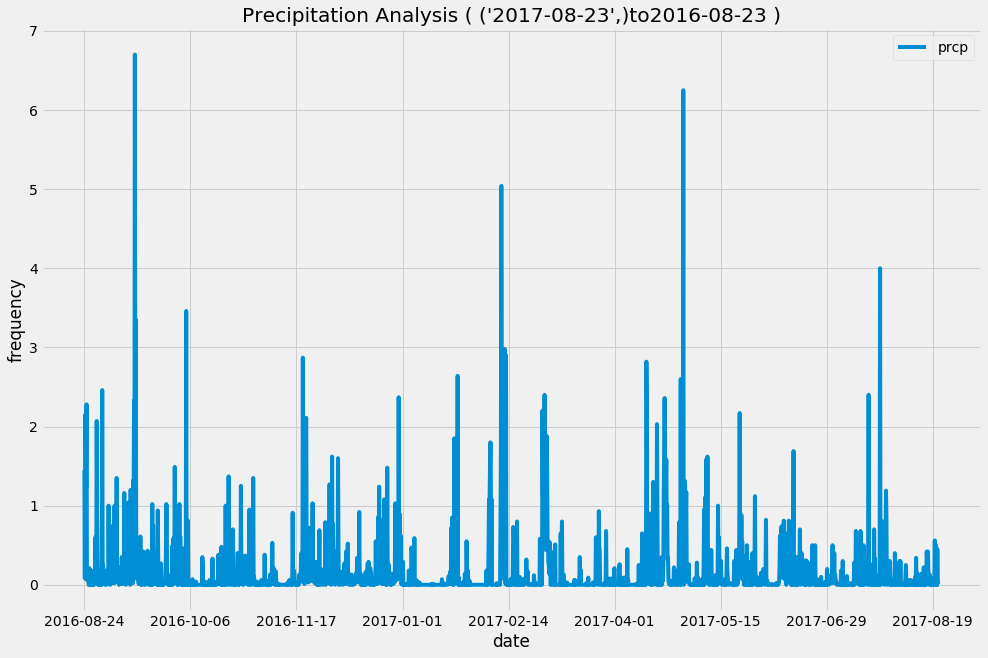

In [10]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results
last_precipDate = (session.query(measurement.date)
                         .order_by(measurement.date.desc())
                         .first())
print('The last date:'+ str(last_precipDate))

# Calculate the date 1 year ago 
year = dt.date(2017,8,23) - dt.timedelta(days=365)

# retrieve the data and precipitation scores
precipitation = (session.query(measurement.date, measurement.prcp)
                         .order_by(measurement.date.desc())
                         .filter(measurement.date > year))

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df = precipitation_df.dropna()
precipitation_df = precipitation_df.set_index('date')

# Sort by date
precipitation_df = precipitation_df.sort_index(ascending=True)

# plot the data
ax = precipitation_df.plot(figsize=(15,10))
ax.set_title("Precipitation Analysis ( " + str(last_precipDate) + "to" + str(year) + " )")
ax.set_ylabel('frequency')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.id).distinct().count()
print('There are ' + str(stations) + ' availabe in this dataset')

There are 9 availabe in this dataset


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = (session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
active_station = station_counts[0][0]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowestTemperture = (session.query(measurement.tobs)
                     .filter(measurement.station == active_station)
                     .order_by(measurement.tobs.asc())
                     .first())
lowestTemperture = lowestTemperture[0]


In [16]:
averageTemperture = (session.query(func.avg(measurement.tobs))
                  .filter(measurement.station == active_station))
averageTemperture = averageTemperture[0][0]

In [17]:
highestTemperture = (session.query(measurement.tobs)
                      .filter(measurement.station == active_station)
                      .order_by(measurement.tobs.desc())
                      .first())
highestTemperture = highestTemperture[0]


In [18]:
print('Lowest Temperture: ' + str(lowestTemperture))
print('Average Temperture: ' + str(averageTemperture))
print('Highest Temperture: ' + str(highestTemperture))

Lowest Temperture: 54.0
Average Temperture: 71.66378066378067
Highest Temperture: 85.0


In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
annual_temperture = (session.query(measurement.tobs)
                    .filter(measurement.date >= year)
                    .filter(measurement.station == active_station)
                    .order_by(measurement.date.desc())
                    .all())

In [20]:
Recorded_temperture = pd.DataFrame(annual_temperture, columns = ['temperature'])

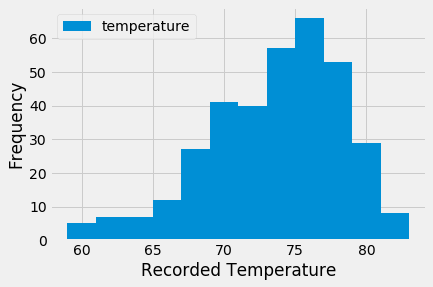

In [21]:
Recorded_temperture.plot.hist(bins = 12)
ax.set_title("Recored Temperatures  ( " + str(last_precipDate) + "to" + str(year) + " ) for " + active_station )
plt.xlabel('Recorded Temperature')
plt.ylabel('Frequency')

plt.show()